In [13]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("/Users/jane/Desktop/MetObjects.csv") 

/Users/jane/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7,8,9,10,11,18,27,28,29,30,31,32,33,34,35,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
print(df.head())

  Object Number  Is Highlight  Is Public Domain  Object ID  \
0    1979.486.1         False             False          1   
1    1980.264.5         False             False          2   
2      67.265.9         False             False          3   
3     67.265.10         False             False          4   
4     67.265.11         False             False          5   

                 Department Object Name                         Title Culture  \
0  American Decorative Arts        Coin  One-dollar Liberty Head Coin     NaN   
1  American Decorative Arts        Coin  Ten-dollar Liberty Head Coin     NaN   
2  American Decorative Arts        Coin    Two-and-a-Half Dollar Coin     NaN   
3  American Decorative Arts        Coin    Two-and-a-Half Dollar Coin     NaN   
4  American Decorative Arts        Coin    Two-and-a-Half Dollar Coin     NaN   

  Period Dynasty                    ...                    Subregion Locale  \
0    NaN     NaN                    ...                      

file_path="/Users/jane/Desktop/MetObjects.csv"
with open(file_path) as file_object:
    contents = file_object.read() 
    print(contents)

a=df.

In [16]:
time=np.unique(df['Object End Date'])

In [17]:
len(time)

2074

In [18]:
max(time)

18591861

In [19]:
min(time)

-35000

In [20]:
problem=df[df['Object End Date']>2018]
len(problem)

242

In [21]:
len(df)

468947

In [22]:
problem_plt=problem.iloc[:,22:24]

In [23]:
problem_plt.plot.scatter(x='Object End Date',y='Object Begin Date')

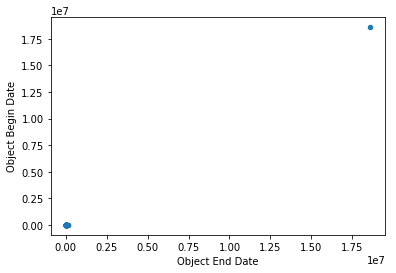

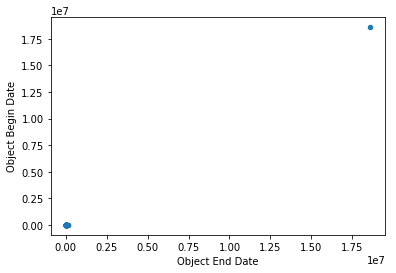

In [24]:
plt.show()

In [25]:
time2=np.unique(df['Object Begin Date'])

In [26]:
len(time2)

2102

In [27]:
max(time2)

18591861

In [28]:
min(time2)

-95000

In [29]:
b=df[df['Object Begin Date']==-95000]
b.iloc[:,22:24]

,Object Begin Date,Object End Date
377063,-95000,-35000


# Department Mapping

In [30]:
Departments=df.iloc[:,4].value_counts()

In [31]:
Departments=pd.DataFrame(Departments)
Departments

,Department
Drawings and Prints,171026
European Sculpture and Decorative Arts,42954
Photographs,38796
Asian Art,37302
Costume Institute,31368
Egyptian Art,27560
American Decorative Arts,18372
Greek and Roman Art,17431
Islamic Art,15770
Modern and Contemporary Art,14519


In [32]:
import squarify

In [144]:
#Adjust size
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 53

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels 此处无用
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

In [34]:
# Another way of Large Plot
plt.rcParams['figure.figsize'] = (40.0, 25.0)

In [35]:
#Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
matplotlib.colors.Normalize(vmin=min(Departments), vmax=max(Departments))
colors = [plt.cm.Blues(Departments) for value in Departments.index]

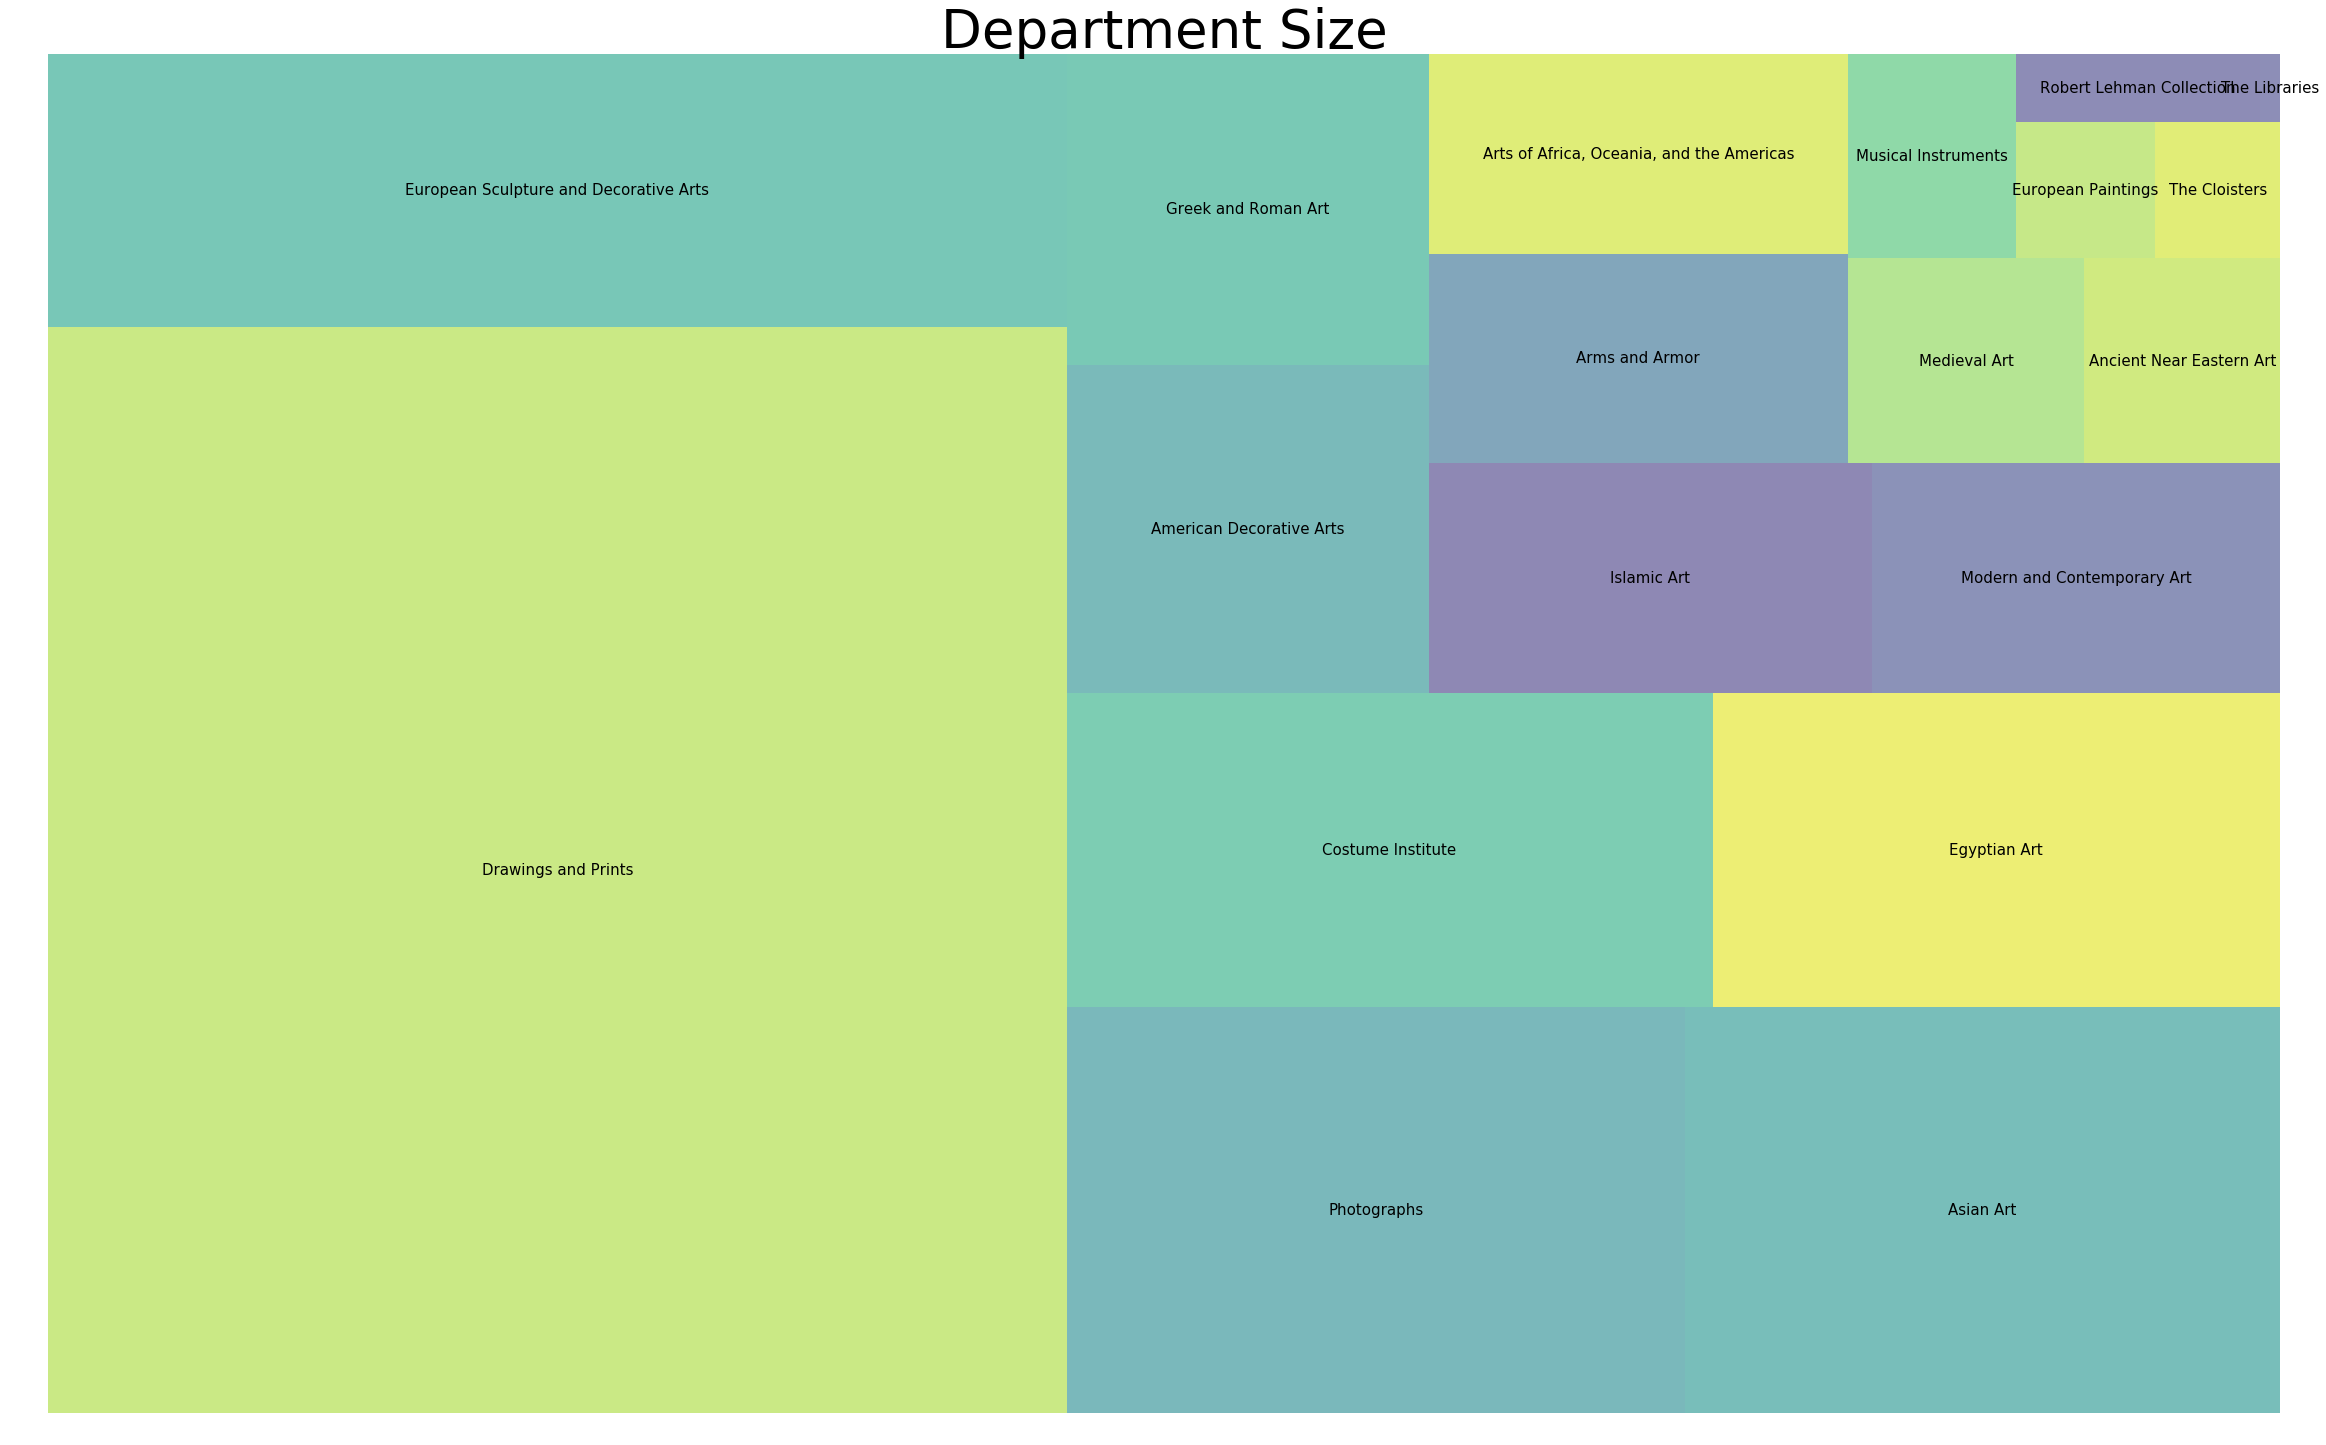

In [166]:
#Treemap
squarify.plot(sizes=Departments['Department'], label=Departments.index, alpha=.6)
plt.title("Department Size")
plt.axis('off')
plt.show()


# Geographic Mapping

I want to examine the distribution of objects by country. Based on the observation from column names, I can analyze Culture or Country column. Since there are too many missing values, I need to decide which one to pick. 


In [167]:
df.shape

(468947, 43)

In [168]:
#np.count_nonzero(~np.isnan(df.Culture))
culture=df.Culture.dropna()
culture.shape

(192115,)

In [169]:
country=df.Country.dropna()
country.shape

(76108,)

In [170]:
#Roughly checking the dataset, it seems that the culture name starts from the first word.
#Extract first word in culture column.
c_1=culture.str.split()
c_1=c_1.str.get(0)
c_1.value_counts()
#There is no culture name probably or possibly. I need to check the characteristics of these columns further.

American         30750
French           18794
Japan            16604
China            14178
Italian           7109
British           6086
Japanese          6011
German            4972
Roman             4918
British,          4585
French,           4219
Italian,          3856
Greek,            3514
European          3390
Cypriot           2923
German,           2782
probably          2357
Spanish           1753
Coptic            1671
possibly          1615
Greek             1549
India             1433
Indonesia         1276
Chinese,          1205
Chinese           1099
Iran              1088
Sasanian          1014
Etruscan           984
Dutch              982
Mexican            887
                 ...  
Campidonae:          1
Guangala             1
Irish?               1
Izi                  1
Nkutshu              1
Mohawk               1
Lunda?               1
Telefolmin           1
southern             1
Sanio                1
Awar                 1
Gothic               1
Kiribati,  

In [171]:
# I only printed first 10 rows because space is limited, but the position of probably changes case by case. 
# For simplicity, I deleted the word probably&possibly
culture[culture.str.contains('probably')].head(3)

399      Dutch, probably
519    British, probably
575    British, probably
Name: Culture, dtype: object

In [172]:
culture[culture.str.contains('possibly')].head(5)

666       British, possibly
804        French, possibly
1570    Bermudian, possibly
1571    Bermudian, possibly
1775      British, possibly
Name: Culture, dtype: object

In [173]:
culture=culture.str.replace('probably?', '')
culture=culture.str.replace('possibly?', '')

In [174]:
#Extract first word in culture column
c_1=culture.str.split()
c_1=c_1.str.get(0)
c_1

14                Mexican
15                Mexican
16                Mexican
17                Mexican
18                Mexican
19                Mexican
20                Mexican
21             Guatemalan
22             Guatemalan
23                Mexican
24                Mexican
25                Mexican
26                Mexican
27                Mexican
28                Mexican
29                Mexican
30                Mexican
31                Mexican
32               American
33               American
34               American
35               American
36                British
37                British
38               American
39               American
40               American
41               American
42               American
59               American
               ...       
465710           American
465792            Indian,
465793            Indian,
465794       Anglo-Indian
466095    Greco-Egyptian,
466121             French
466122             French
466336      

In [175]:
# Count unique values in culture
c_1=c_1.str.replace(',', '')
c_1=c_1.str.replace(',', '')
c_1=c_1.value_counts()
c_1

American            31519
French              24109
Japan               16606
China               14203
Italian             11325
British             11065
German               8131
Japanese             6117
Roman                5498
Greek                5076
European             3715
Cypriot              2923
Chinese              2324
Spanish              2248
Coptic               1671
India                1470
Dutch                1439
Indonesia            1283
Indian               1154
Russian              1090
Iran                 1090
Etruscan             1039
Sasanian             1014
Austrian              965
Flemish               950
Mexican               898
Frankish              798
Minoan                776
Moche                 728
Asmat                 651
                    ...  
Parisian                1
Portugal?               1
So                      1
Bosian                  1
Campidonae:             1
Austro-German           1
Zigula                  1
Chinese?    